Examples and procedures taken from the recitation of Module 2 - Genomics and High-Dimensional Data
(https://learning.edx.org/course/course-v1:MITx+6.419x+1T2021/block-v1:MITx+6.419x+1T2021+type@sequential+block@genomics_rec1/block-v1:MITx+6.419x+1T2021+type@vertical+block@genomics_rec1-tab1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style.colors import resolve_colors

plt.style.use('seaborn-whitegrid')

In [64]:
X, y = load_wine(return_X_y=True)
n_samples = X.shape[0]
n_features = X.shape[1]
X.shape

(178, 13)

In [3]:
# Standardized version of the features
wine_std = (X-np.mean(X, axis=0)) / np.std(X, axis=0)

We might first try to plot 2 features of our data set along with the ground truth
to see if we can already observe some pattern

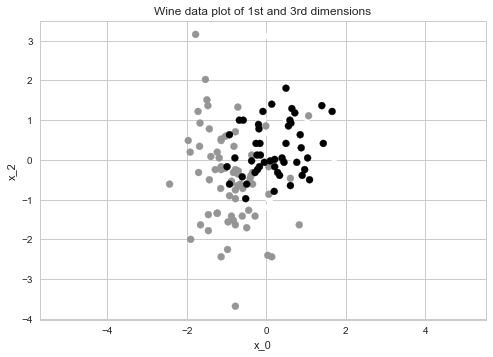

In [31]:
plt.scatter(wine_std[:,0], wine_std[:,2], c=y)
plt.title('Wine data plot of 1st and 3rd dimensions')
plt.xlabel('x_0')
plt.ylabel('x_2')

plt.axis('equal')
plt.show()

# No evident pattern seem to appear here.
# We can perform PCA to transform the data along components that maximize the variance

## Dimensionality reduction

### Principal Component Analysis (PCA)

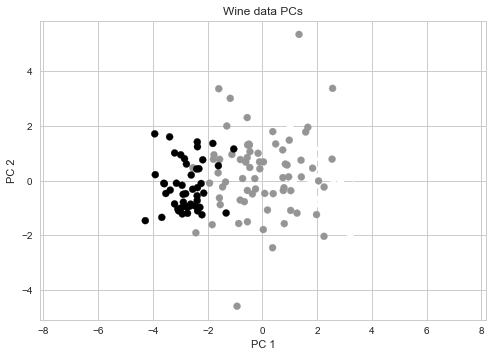

In [57]:
#PCA
pca_wine = PCA().fit(wine_std)
pcs = pca_wine.transform(wine_std)

plt.scatter(pcs[:, 0], pcs[:, 2], c=y)
plt.title('Wine data PCs')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')

plt.show()

Now we need to decide how many components we wish to keep.
There are two methods to decide on the number of principal components to keep:
- Scree plot

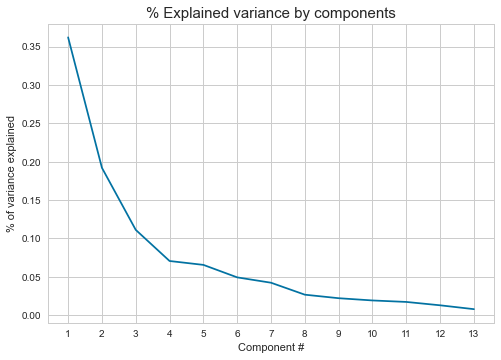

In [73]:
# Scree plot
plt.plot(np.arange(1, n_features+1, step=1), pca_wine.explained_variance_ratio_[0:n_features])
plt.title('% Explained variance by components', size=15)

plt.xticks(np.arange(1, n_features+1, step=1))
plt.xlabel('Component #')
plt.ylabel('% of variance explained')

plt.show()


In [98]:
# By looking at the scree plot we can tell that the elbow is around 4-5 principal components.
# We can see how much of the variance we can explain by keeping those 4-5 components:
print('Variance explained by keeping 5 components', np.sum(pca_wine.explained_variance_ratio_[0:5]))  # By keeping the first 5 principal components, we can explain 80% of the variance in the data set

#Or we can get the number of principal components needed to get a given explained variance threshold
threshold = 0.80
print('#components required to explain {} of the variance: {}'.format(threshold, np.where(np.cumsum(pca_wine.explained_variance_ratio_) >= threshold)[0][0]+1))

Variance explained by keeping 5 components 0.8016229275554788
#components required to explain 0.8 of the variance: 5


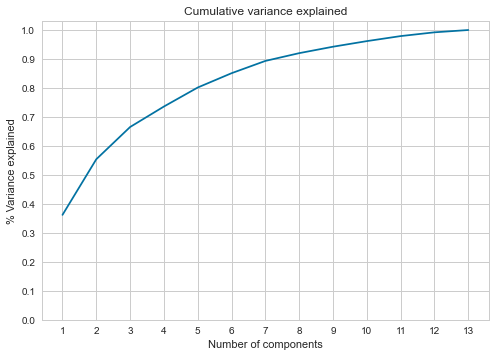

In [88]:
# Hence, we can plot the cumulative explained variance
# and set the minimum threshold for the explained variance we want to have.
plt.plot(np.arange(1, n_features+1), np.cumsum(pca_wine.explained_variance_ratio_))
plt.title('Cumulative variance explained')

plt.xticks(np.arange(1, n_features+1, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

plt.show()

### Multidimensional Scaling (MDS)

breaking at iteration 214 with stress 22390.108834479044
breaking at iteration 232 with stress 22768.58946859709
breaking at iteration 226 with stress 22118.554330897612
breaking at iteration 291 with stress 22957.817585520017


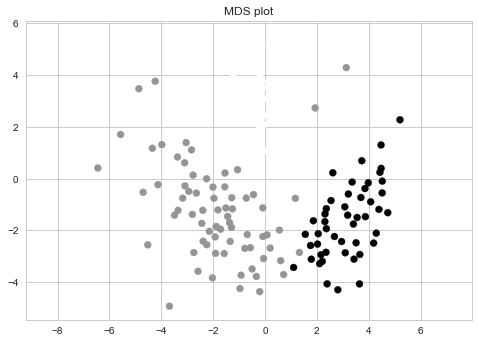

In [105]:
mds_wine = MDS(n_components=2, verbose=1, eps=1e-5)
mds_wine.fit(wine_std)

plt.scatter(mds_wine.embedding_[:,0], mds_wine.embedding_[:,1], c=y)
plt.title('MDS plot')
plt.axis('equal')

plt.show()

breaking at iteration 198 with stress 24604.06758179125
breaking at iteration 283 with stress 23340.272668981146
breaking at iteration 275 with stress 23127.408895915498


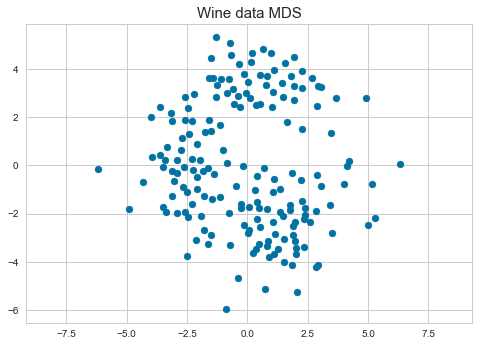

In [107]:
mds_wine = MDS(n_components=2, verbose=1, eps=1e-5).fit_transform(wine_std)

plt.scatter(mds_wine[:, 0], mds_wine[:, 1])
plt.title('Wine data MDS', size=15)
plt.axis('equal')

plt.show()

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
# We try with different values of perplexity ()
for perplexity in [5, 10, 30, 50, 80, 100]:
    tsne_wine = TSNE(n_components=2, perplexity=perplexity).fit_transform(wine_std)

    plt.scatter(tsne_wine[:,0], tsne_wine[:,1])
    plt.title('Wine data t-SNE, perplexity={}'.format(perplexity), size=15)
    plt.axis('equal')

    plt.show()

# It looks like the clearest visualization appears with perplexity=50

In [ ]:
tsne_wine = TSNE(n_components=2, perplexity=50).fit_transform(wine_std)

### Silhouette and Scree/Elbow plots

We can assess the quality of clustering, and the good number of clusters selected
by plotting a silhouette plot, and a scree/elbow plot.

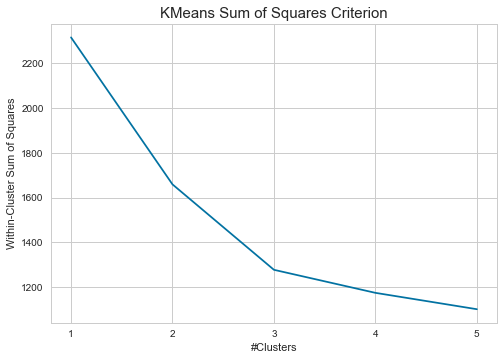

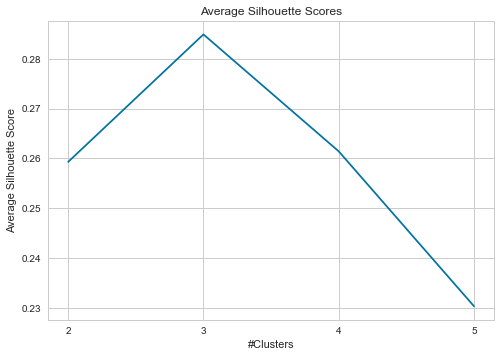

In [108]:
plt.plot(np.arange(1,6), [KMeans(i,n_init=50).fit(wine_std).inertia_ for i in range(1,6)])
plt.xticks(np.arange(1, 6, step=1))
plt.title('KMeans Sum of Squares Criterion', size=15)
plt.xlabel('#Clusters')
plt.ylabel('Within-Cluster Sum of Squares')

plt.show()

plt.plot(np.arange(2, 6), [silhouette_score(wine_std, KMeans(i, n_init=50).fit(wine_std).labels_) for i in range(2,6)])
plt.xticks(np.arange(2, 6, step=1))
plt.title('Average Silhouette Scores')
plt.xlabel('#Clusters')
plt.ylabel('Average Silhouette Score')

plt.show()

# Both the elbow plot and the silhouette plot seem to agree on 3 as the best number of clusters.

In [ ]:
# We can visualize more explicitly the silhouette scores
for i in range(2,6):
    clustering = KMeans(i,n_init=50)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    visualizer = SilhouetteVisualizer(clustering, colors='yellowbrick', is_fitted=False, ax=ax1)
    visualizer.fit(wine_std)

    colors = np.array(resolve_colors(i, 'yellowbrick'))
    ax2.scatter(pcs[:,0], pcs[:,1],c=colors[clustering.labels_])
    ax2.axis('equal')

    #set the axis to be the same for all plots
    visualizer.finalize()
    ax1.set_xlim((-.2,.6))
    plt.show()

After further exploration, the best number of cluster indeed seem to be 2 or 3.

We'll choose 3 and perform the other dimensionality reduction techniques with #clusters=3.

In [ ]:
clustering = KMeans(3, n_init=50)
clustering.fit(wine_std)
colors = np.array(resolve_colors(3,'yellowbrick'))

In [ ]:
# MDS
mds_wine = MDS(n_components=2).fit_transform(wine_std)

plt.scatter(mds_wine[:,0], mds_wine[:,1], c=colors[clustering.labels_])
plt.title('KMeans, Wine MDS')
plt.axis('equal')

plt.show()


In [ ]:
#t-SNE
plt.scatter(tsne_wine[:,0], tsne_wine[:,1], c=colors[clustering.labels_])

plt.title('KMeans, Wine t-SNE')
plt.axis('equal')

plt.show()


Let's plot some of our clustering in comparison to the ground truth

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.scatter(tsne_wine[:,0], tsne_wine[:,1], c=colors[clustering.labels_])
ax1.set_title('KMeans, Wine t-SNE')
ax1.axis('equal')

ax2.scatter(tsne_wine[:,0], tsne_wine[:,1], c=colors[y])
ax2.set_title('Wine t-SNE, Ground truth')
ax2.axis('equal')

plt.show()

### Logistic Regression